In [1]:
from numpy import pi

import numpy as np
import matplotlib.pyplot as plt

import codevp as vp

In [14]:
mirror = {
    'shape': 'conic',
    'inter': 'reflection',
    'D': np.array([0.,pi,0.]),
    'P': np.array([0.,0.,10.]),
    'kappa': 0.,
    'c': 0.05,
    'Diam': 3.6,
}

small_mirror = {
    'shape': 'plane',
    'inter': 'reflection',
    'D': np.array([0.,-pi/4.,0.]),
    'P': np.array([0.,0.,2.]),
    'Diam': 1.4,
}

selector = {
    'shape': 'plane',
    'inter': 'stop',
    'D': np.array([0., 0., 0.]),
    'P': np.array([0., 0., 0.1]),
    'Diam': 1.8*2,
    'diam': 1.4
}

stop = {
    'shape': 'plane',
    'inter': 'stop',
    'P': np.array([0., -4.6, 2.]),
    'D': np.array([0., pi/2., 0.]),
    'Diam': .8
}

lensy = -4.
thickness = .1

lens1 = {
    'shape':'conic',
    'inter': 'refraction',
    'P': np.array([0., lensy, 2.]),
    'D':np.array([0., 3*pi/2., 0.]),
    'Diam': 0.8,
    'kappa':0.,
    'N':1.8,
    'c': 0.3
}

lens2 = {
    'shape':'conic',
    'inter': 'refraction',
    'P': np.array([0., lensy-thickness, 2.]),
    'D':np.array([0., pi/2., 0.]),
    'Diam': 0.8,
    'kappa':0.,
    'c': 0.3
}

geo = [selector, mirror, small_mirror, lens1, lens2, stop]
ray_group = vp.ray_plane(geo, [0., 0., 0.], 1.8, d=[0.,0.,1.], nrays=50)

In [15]:
rayparams = {'color': 'red',
             'alpha': 0.3}

gplt = vp.geoplot(geo, ray_group, pltparams=rayparams)
oplt = vp.optplot(geo, ray_group)

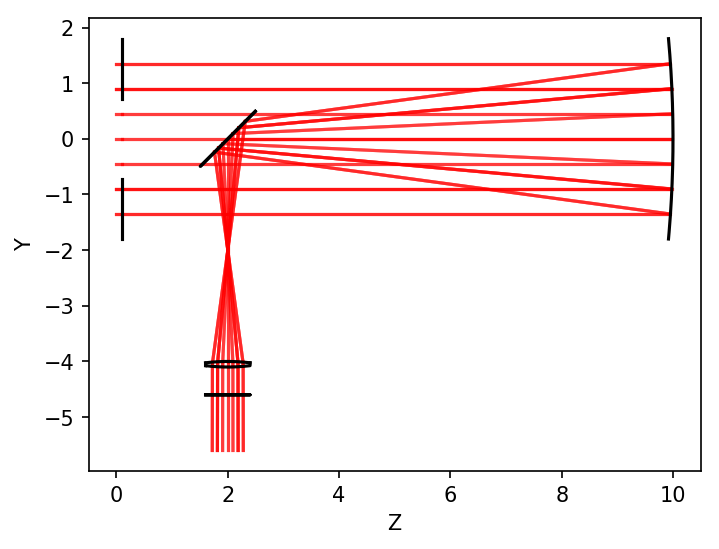

In [16]:
plt.figure(dpi=150)
gplt.plotyz()

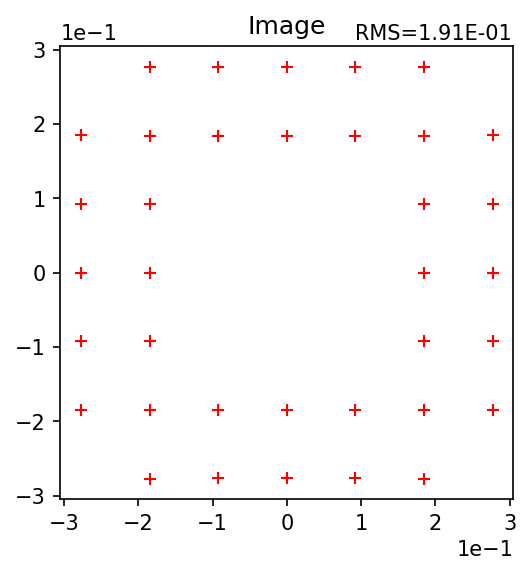

In [17]:
plt.figure(dpi=150)
oplt.spotdiagram()
plt.title("Image")
plt.show()

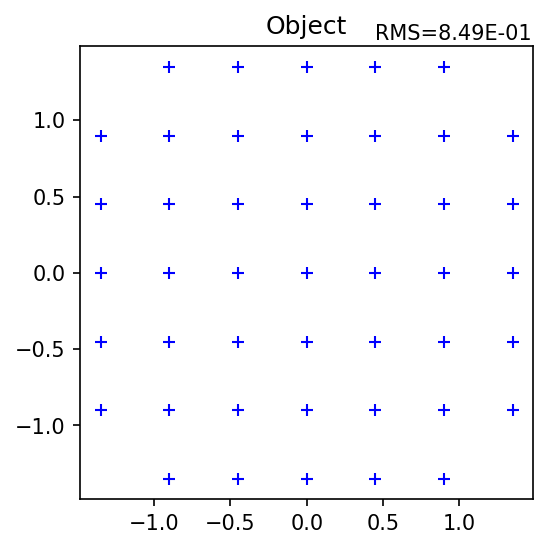

In [18]:
plt.figure(dpi=150)
oplt.plotobject()
plt.title("Object")
plt.show()